This script demonstrates a simple machine learning workflow using the K-Nearest Neighbors (KNN) algorithm.

- KNN is a simple, non-parametric, lazy learning algorithm used for classification and regression tasks, which predicts the class or value of a data point based on the majority class or average of its k-nearest neighbors in the feature space.
  - **non-parametric** algorithms can adapt to the data's structure and complexity, often using the entire dataset or a significant portion of it to make predictions, allowing for greater flexibility and the ability to capture intricate patterns.
  - A **lazy learning algorithm** is a type of machine learning approach that delays the generalization or model-building process. It is highly flexible and capable of capturing complex patterns in the data without making strong assumptions about the underlying data distribution. It does not create a general model during the training phase; instead, it stores the training data and performs computation during prediction time.
- The process imports pandas for data manipulation, matplotlib and seaborn for data visualization, and scikit-learn for machine learning tasks.
  - **Seaborn** is a Python data visualization library based on matplotlib that provides a high-level interface for drawing attractive and informative statistical graphics.
  - **Scikit-learn** is a popular open-source machine learning library in Python that provides simple and efficient tools for data mining, data analysis, and machine learning, built on top of NumPy, SciPy, and matplotlib.
- A sample dataset is created in a pandas DataFrame with two features and corresponding labels.
  - **Features** are the measurable properties or characteristics of the data that are used as input to the machine learning model. They are also known as **attributes**, **variables**, or **predictors**. They are typically represented as columns, and each feature contributes to the input that the model uses to make predictions. For example, in a dataset for predicting house prices, features could include the size of the house, the number of bedrooms, and the age of the house.
  - **Labels** (also known as **targets** or **output variables**) are the
   outcomes that the machine learning model aims to predict. They are the "ground truth" (the real-world outcomes that serve as the definitive standard against which predictions are compared) that the model is trained on and evaluated against. In **supervised learning**, labels are provided for each training example, and the model learns to map the input features to the corresponding labels. For example, in the house price prediction dataset, the label would be the actual price of each house.
- The data is visualized using a scatter plot to understand the distribution of the features and labels.
  - The scatterplot visualizes the relationship between two features (Feature1 and Feature2) from the dataset, with each data point representing an individual observation. The data points are colored and styled based on their label, which can be either 'A' or 'B
  - The plot provides a clear visual distinction between the two classes (labels 'A' and 'B').
  - There are regions where points of the same label cluster together, indicating that Feature1 and Feature2 might be good discriminators between the classes.
  - There is some overlap between the clusters of the two labels, suggesting that there might be regions where the model could misclassify points.
- The labels are then converted from categorical to numerical values to prepare the data for machine learning.
  -  most machine learning algorithms require numerical input to perform calculations and make predictions.
- The dataset is split into training and testing sets, ensuring that the model can be evaluated on unseen data.
  - The train_test_split function uses a test_size of 0.3 and random_state=42, ensuring that 30% of the data is reserved for evaluating the model's performance on unseen data while 70% is used for training, and the random_state parameter ensures the split is reproducible.
  - The 70/30 split is a commonly used ratio for dividing a dataset into training and testing sets, where 70% of the data is used for training the model and 30% is used for testing its performance. This balance aims to provide enough data for training to achieve good model learning while retaining a significant portion for evaluating the model's generalization to new data. Other common values are 80/20 and 90/10, depending on the size and complexity of the dataset.
  - The random_state value of 42 is arbitrary; it ensures that the split of the dataset into training and testing sets is reproducible (42, of course, is the "answer to the ultimate question of life, the universe, and everything")
- A KNN classifier is instantiated, trained on the training data, and subsequently ready for evaluation on the test set, showcasing a complete cycle from data preparation to model training.
  - KNeighborsClassifier is a class in the scikit-learn library which uses the KNN algorithm. As you might guess, there are many more algorithms available (too many to list here).

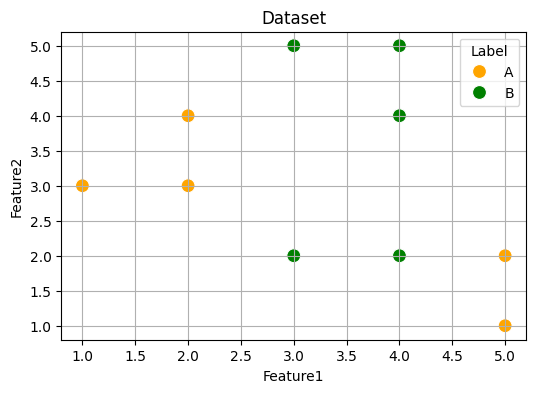

KNeighborsClassifier(n_neighbors=3)

In [ ]:
import pandas as pd

# used for plotting the scatter plot of the dataset.
import matplotlib.pyplot as plt

# used to enhance the color and style of the scatter plot
import seaborn as sns

# used to create, train, and use the K-Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier

# used to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# used for evaluating the KNN model by generating a confusion matrix
# and classification report.
from sklearn.metrics import confusion_matrix, classification_report

# Set up the data
df = pd.DataFrame({
    'Feature1': [2, 4, 4, 5, 3, 1, 4, 5, 2, 3],
    'Feature2': [3, 4, 2, 2, 5, 3, 5, 1, 4, 2],
    'Label': ['A', 'B', 'B', 'A', 'B', 'A', 'B', 'A', 'A', 'B']
})

# Plot the data
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, s=100,
                palette=['orange', 'green'], style='Label', markers=['o', 'o'])
plt.title('Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Label')
plt.grid(True)
plt.show()

# Convert string labels to numerical values
label_mapping = {'A': 0, 'B': 1}
df['Label'] = df['Label'].map(label_mapping)

# Split dataset into train and test sets
X = df[['Feature1', 'Feature2']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

This following code section makes the predictions and evaluates the model.
- After training the KNN model, predictions are made on the test data using knn.predict(X_test).
- The performance of the model is evaluated using a confusion matrix and classification report.
  - The confusion matrix is a summary of prediction results on a classification problem, showing the number of correct and incorrect predictions broken down by each class.
  - The classification report provides key metrics such as precision, recall, f1-score, and support for each class, helping to understand the performance of the classifier in more detail.

In [ ]:
# Making predictions and evaluating the model
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Output the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[0 2]
 [0 1]]

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3



## Evaluating the results
###Confusion Matrix
```
         Predicted
          0   1
Actual 0 [TN  FP]
       1 [FN  TP]

Test Data:

         [0 2]
         [0 1]
```
- True Negatives (TN): 0 instances where the actual class is A (class 0) and it is correctly predicted as A (class 0)
- False Positives (FP): 2 instances where the actual class is A (class 0) but it is incorrectly predicted as B (class 1)
- False Negatives (FN): 0 instances where the actual class is B (class 1) but it is incorrectly predicted as A (class 0)
- True Positives (TP): 1 instance where the actual class is B (class 1) and it is correctly predicted as B (class 1)

### Classification Report
```
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.33      1.00      0.50         1

    accuracy                           0.33         3
   macro avg       0.17      0.50      0.25         3
weighted avg       0.11      0.33      0.17         3
```

**Breakdown of Metrics**

- Precision: The proportion of positive identifications that were actually correct. It tells us how many of the predicted positive classes were actually correct.
  - For class 0 (A): 0.00 (0% of predicted class 0 instances were correct)
  - For class 1 (B): 0.33 (33% of predicted class 1 instances were correct)
- Recall: The proportion of actual positives that were correctly identified. It tells us how many of the actual positive classes were correctly predicted.
  - For class 0 (A): 0.00 (0% of actual class 0 instances were correctly predicted)
  - For class 1 (B): 1.00 (100% of actual class 1 instances were correctly predicted)
- F1-Score: The "harmonic mean" of precision and recall. It provides a balance between precision and recall.
  - For class 0 (A): 0.00 (F1-score is 0 due to both precision and recall being 0)
  - For class 1 (B): 0.50 (a balance between precision and recall for class 1)
- Support: The number of actual occurrences of each class in the dataset.
  - For class 0 (A): 2 instances
  - For class 1 (B) : 1 instance
Accuracy: The proportion of all instances that were correctly classified.
  - Accuracy: 0.33 (33% of the total instances were correctly classified)
- Macro Average: The average of precision, recall, and F1-score calculated for each class independently and then averaged. It treats all classes equally.
  - Precision: 0.17
  - Recall: 0.50
  - F1-Score: 0.25
- Weighted Average: The average of precision, recall, and F1-score, but each metric is weighted by the number of instances of each class (support). It accounts for class imbalance.
  - Precision: 0.11
  - Recall: 0.33
  - F1-Score: 0.17



**Interpreting the Report**

- Class 0 (A) Metrics: The model performed poorly for class 0, with a precision, recall, and F1-score of 0. This indicates that the model failed to correctly predict any instances of class 0.
- Class 1 (B) Metrics: The model had a perfect recall for class 1 (1.00), meaning it correctly identified all actual class 1 instances. However, the precision was low (0.33), indicating a high number of false positives.
- Overall Accuracy: The overall accuracy is 33%, which is quite low and indicates that the model correctly classified only 1 out of 3 instances.
- Macro Average: The macro average shows a low precision and F1-score, reflecting poor overall performance across both classes.
- Weighted Average: The weighted average accounts for the number of instances in each class and also shows poor performance metrics.

## Impact of Increasing and Balancing the Dataset on Model Training and Prediction

The following code section modifies the dataset and repeats the training/prediction process to demonstrate associated the impact.

**Increasing the Dataset Size**

- Doubling the dataset increases the amount of data available for training and testing the model. Larger datasets can help improve the robustness and generalization ability of the model.
- More data can lead to better performance and more reliable evaluation metrics, reducing the risk of overfitting (where the model performs well on training data but poorly on unseen data).

**Balancing the Data**

- Balancing the data ensures that each class (label) has an equal number of instances. In this context, it means having an equal number of 'A' and 'B' labels.
- This addresses the issue of class imbalance, where one class has significantly more instances than the other. Class imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. By balancing the classes, the model learns to recognize both classes equally well, leading to improved classification performance and more accurate evaluation metrics.

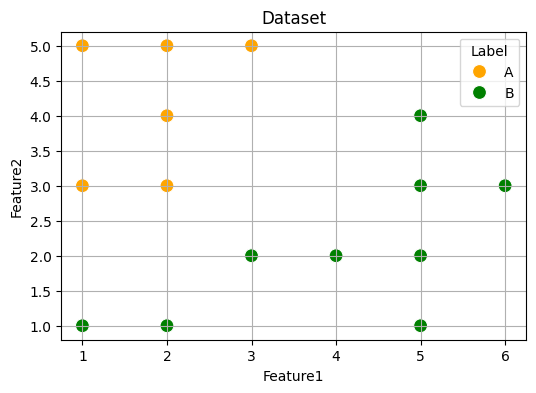

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# double and balance the data

df = pd.DataFrame({
    'Feature1': [2, 5, 4, 5, 3, 1, 2, 5, 2, 3,
                 6, 3, 2, 1, 5, 2, 3, 5, 2, 1],
    'Feature2': [3, 3, 2, 2, 5, 3, 5, 1, 4, 2,
                 3, 2, 1, 5, 2, 3, 2, 4, 4, 1],
    'Label': ['A', 'B', 'B', 'A', 'A', 'A', 'A', 'B', 'A', 'B',
              'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A', 'B']
})

# Plot the data
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Feature1', y='Feature2', hue='Label', data=df, s=100,
                palette=['orange', 'green'], style='Label', markers=['o', 'o'])
plt.title('Dataset')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend(title='Label')
plt.grid(True)
plt.show()

# Convert string labels to numerical values
label_mapping = {'A': 0, 'B': 1}
df['Label'] = df['Label'].map(label_mapping)

# Split dataset into train and test sets
X = df[['Feature1', 'Feature2']]
y = df['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creating and training the K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

In [ ]:
# Making predictions and evaluating the model
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=0)

# Output the confusion matrix and classification report
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[2 2]
 [0 2]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       0.50      1.00      0.67         2

    accuracy                           0.67         6
   macro avg       0.75      0.75      0.67         6
weighted avg       0.83      0.67      0.67         6



Modifying the dataset resulted in significant improvements in model performance. The classifier now has a higher overall accuracy and more balanced performance metrics.

- The accuracy improved from 33% to 67%, indicating that the model is performing better with the increased and balanced dataset.
- Precision for class A improved to 1.00, and recall improved to 0.50. This suggests that the model now correctly identifies more instances.
- The F1-scores for both classes are now equal (0.67), indicating balanced performance across classes.


In practice, modifying datasets for better model performance is a common and realistic approach in data science.
- In fields like computer vision, techniques like rotation, flipping, and cropping are used to artificially increase the dataset size.
- Class sizes are adjusted by oversampling or undersampling.
- More data is collected for better representation.